In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#read the dataset
data = pd.read_csv('netflix.csv')

In [3]:
print("The shape of the data set is ", data.shape , "which tells us there are ",data.shape[0], " records and 12 features")
data.shape
print()
print("The data types seem to be all categorical except for release year which is int ")
print()
print(data.dtypes)

The shape of the data set is  (8807, 12) which tells us there are  8807  records and 12 features

The data types seem to be all categorical except for release year which is int 

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


Lets explore the data a little before the preprocessing
steps . 

In [4]:
print("Column wise NAN")
data.isna().sum()

Column wise NAN


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The exploration is : 
- number of movies to tv shows ratio .
- most popular director based on number of releases .
- top countries releasing movies 
- Which year has max movie releases 

In [5]:
num_movies = data["type"].value_counts()[0]
num_shows = data["type"].value_counts()[1]

print("Number of Movies ",num_movies)
print("Number of TV Shows ",num_shows)
print("Ratio of movies to tv shows  ",num_movies/num_shows)



Number of Movies  6131
Number of TV Shows  2676
Ratio of movies to tv shows   2.2911061285500747


### Insight ###
 - The number of movies are double the number of shows . Netflix should replicate the movie data across clusturs so as to  provide horizontal scalibility and load balancing to the increased traffic on movies .
 

Top countries releasing movies

In [6]:
data["country"]=data["country"].str.split(',')

data = data.explode("country",ignore_index=True)

data["country"]=data["country"].str.strip(" ") # clean the string

print("Top 3 countries releasing movies")
print()
print(data["country"].value_counts()[:3])
print('\n\n\n')


print("Bottom 3 countries releasing movies")
print()
print(data["country"].value_counts()[-3:])
print('\n\n\n')


df = data["country"].value_counts()
df=df.reset_index()

print("Number of countries having atleast 30 releases ",df[df["country"]>30].count()["index"])


Top 3 countries releasing movies

United States     3690
India             1046
United Kingdom     806
Name: country, dtype: int64




Bottom 3 countries releasing movies

Mongolia      1
Bahamas       1
Montenegro    1
Name: country, dtype: int64




Number of countries having atleast 30 releases  35


### Insight ###
- United States and India provide most number of movies to Netflix and including UK consist of more than half the content . The company should increase there **outreach** in these two countries 
- Also the production houses in these contries should be provided with **incentives** to increase the content even more 
- More precise **recomender systems** for the top 3 countries to enhance customer experience .

- Steps must be taken to get releases from the bottom 3 countries and the median countries so as to gegraphically scale the business

In [7]:
print("Most movies are from the years (with the count) -- ")
print(data["release_year"].value_counts().iloc[0:3])

Most movies are from the years (with the count) -- 
2018    1392
2017    1276
2019    1208
Name: release_year, dtype: int64


Listed_in (Genere) analysis - null values present

In [8]:
print("Dramas -- ",data[data["listed_in"].str.contains("Drama")].count()[0])
print("Comedies --",data[data["listed_in"].str.contains("Comedies")].count()[0])
print("Family Movies --",data[data["listed_in"].str.contains("Family")].count()[0])
print("Romantic --",data[data["listed_in"].str.contains("Romantic")].count()[0])
print("Thrillers --",data[data["listed_in"].str.contains("Thriller")].count()[0])
print("Horror Movies --",data[data["listed_in"].str.contains("Horror")].count()[0])
print("Mystery Movies",data[data["listed_in"].str.contains("Myste")].count()[0])
print("Action/Adventure",data[data["listed_in"].str.contains("Action")].count()[0])
print("Documentaries",data[data["listed_in"].str.contains("Docum")].count()[0])

Dramas --  4054
Comedies -- 2611
Family Movies -- 845
Romantic -- 1106
Thrillers -- 872
Horror Movies -- 544
Mystery Movies 113
Action/Adventure 1386
Documentaries 1118


In [9]:
print("The top 3 directors based on number of releases")
data["director"].value_counts()[:3]

The top 3 directors based on number of releases


Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Martin Scorsese           18
Name: director, dtype: int64

In [10]:
data.shape

(10850, 12)

### Preprocessing ###

As you can see there are 
- columns with multiple comma seperated values 
- NAN data 
- we need to change date feature variables to datetime type from object type 
***we need to clean the data before proceeding***.

Columns that need to be exploded : 
- director 
- cast
- country (exploded in one of the cells above)
- listed_in (genere)

In the duration column the number must be extracted and converted to int 

In [11]:
#Explore column types
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

### Filling country null value -- 5/8th  United States , 2/8th India .1/8th United Kingdom (randomly) ###
this has been done by looking at the value_counts() distribution

In [12]:
freq_country=data['country'].value_counts().index[:3] ## get top 3 countries

def fun(x):
    r = np.random.randint(8)
    if pd.isnull(x):
        if r < 5 :
            return freq_country[0]
        elif r < 7:
            return freq_country[1]
        else:
            return freq_country[2]
    else: 
        return x
data['country']=data["country"].apply(fun)
data['country'].isnull().sum()

0

In [13]:
#convert date added and release year to datetime type

data["date_added"]=pd.to_datetime(data["date_added"])
data["release_year"]=pd.to_datetime(data["release_year"],format='%Y')
data["release_year"] = data["release_year"].dt.year

In [14]:
# extract duration
data["duration"]
df = data["duration"].str.split()
data["duration"]=df.loc[:].str[0]


### Un-nest the data ### 

In [15]:
#convert data in to list for the above mentioned columns

data["director"]=data["director"].str.split(',')
data["cast"]=data["cast"].str.split(',')
data["listed_in"]=data["listed_in"].str.split(',')

# use explode function to unnest data 

data=data.explode('director',ignore_index=True)
data['director']=data['director'].str.strip(" ")
data=data.explode("cast",ignore_index=True)
data['cast']=data['cast'].str.strip(" ")
data=data.explode("listed_in",ignore_index=True)
data['listed_in']=data['listed_in'].str.strip(" ")


we can see that the number records have increased after exploding . This Data is free of multiple attribute values.

In [16]:
print("The shape is ",  data.shape)

The shape is  (202065, 12)


Lets explore the data set before filling missing values 

In [17]:
print("Column wise NAN")
data.isna().sum()

Column wise NAN


show_id             0
type                0
title               0
director        50643
cast             2149
country             0
date_added        158
release_year        0
rating             67
duration            3
listed_in           0
description         0
dtype: int64

### Logic for filling null values ###

- for **director** column fill with **country specific mode (most frequent)**
- for  **cast** column fill with **country specific mode**
- for **country** column fill **2/3 rd** data with **mode of country** and the rest with **second most frequent**
- for date added fill with mean of years
- for **rating** fill with mode **type specific**
- for **duration** fill with mean 


### fill nan for directors ###
 - most frequent director (movies) as per country
 - most frequent director (tv show) as per country


In [18]:
cd_mode_movie = data[data["type"]=="Movie"].groupby("country",dropna=False)["director"].apply(pd.Series.mode)
cd_mode_tv = data[data["type"]=="TV Show"].groupby("country",dropna=False)["director"].apply(pd.Series.mode)
cd_mode_movie = cd_mode_movie.reset_index()
cd_mode_tv = cd_mode_tv.reset_index()

nan_c_movie = set(data["country"]).difference(set(cd_mode_movie["country"]))
nan_c_tv = set(data["country"]).difference(set(cd_mode_tv["country"]))
cd_mode_movie = data[data["type"]=="Movie"].groupby("country",dropna=False)["director"].apply(pd.Series.mode)
cd_mode_tv = data[data["type"]=="TV Show"].groupby("country",dropna=False)["director"].apply(pd.Series.mode)
cd_mode_movie["United States"]

0    Martin Scorsese
Name: director, dtype: object

In [19]:
def fun_movie(x,y):
    if pd.isna(x):
        if y in nan_c_movie:
            return "Unknown Director"
        else:
            return cd_mode_movie[y][0]
    else:
        return x
        
def fun_tv(x,y):
    if pd.isna(x):
        if y in nan_c_tv:
            return "Unknown Director"
        else:
            return cd_mode_tv[y][0]
    else:
        return x 
    
data_movie = data.loc[data["type"]=="Movie"] 
data_tv = data.loc[data["type"]=="TV Show"]    
data.loc[data.type=="Movie","director"]=data_movie.loc[:,["director","country"]].apply(lambda x : fun_movie(x["director"],x["country"]),axis=1)
data.loc[data.type=="TV Show","director"]=data_tv.loc[:,["director","country"]].apply(lambda x : fun_tv(x["director"],x["country"]),axis=1)



### fill nan for cast ###

In [20]:
data["director"].isnull().sum()

0

In [21]:
cc_mode = data.groupby("country",dropna=False)["cast"].apply(pd.Series.mode)
cc_mode = cc_mode.reset_index()

nan_c = set(data["country"]).difference(set(cc_mode["country"]))
cc_mode = data.groupby("country",dropna=False)["cast"].apply(pd.Series.mode)


def fun(x,y):
    if pd.isna(x):
        if y in nan_c:
            return "Unknown Cast"
        else:
            return cc_mode[y][0]
    else:
        return x
        
    
    
data["cast"]=data.loc[:,["cast","country"]].apply(lambda x : fun(x["cast"],x["country"]),axis=1)


### fill null values for date_added , rating and duration  ###

In [22]:
data["date_added"].fillna(data["date_added"].dt.year.mean().astype('int'),inplace=True)

In [23]:
def fun(x,y):
    if pd.isna(x):
        if y == "Movie":
            return data[data["type"]=="Movie"]["rating"].mode()[0]
        else:
            return data[data["type"]=="TV Show"]["rating"].mode()[0]
    else:
        return x
        
data["rating"] = data.apply(lambda x : fun(x["rating"],x["type"]),axis=1)

In [24]:
def fun(x,y):
    if pd.isna(x):
        if y == "Movie":
            return data[data["type"]=="Movie"]["duration"].mean()
        else:
            return data[data["type"]=="TV Show"]["duration"].mean()
    else:
        return x
data["duration"] = pd.to_numeric(data["duration"],errors='coerce')        
data["duration"] = data.apply(lambda x : fun(x["duration"],x["type"]),axis=1)

**Now we have 0 null values in the set**

In [25]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Explore data and gain Insights ###

In [26]:
a=data.groupby("title")["release_year"].unique().reset_index()["release_year"]
a=a.apply(lambda x : x[0])
df = pd.DataFrame({'year':a})
df


,year
0,2020
1,2019
2,2018
3,2020
4,2018
...,...
8802,2012
8803,2016
8804,2015
8805,2017


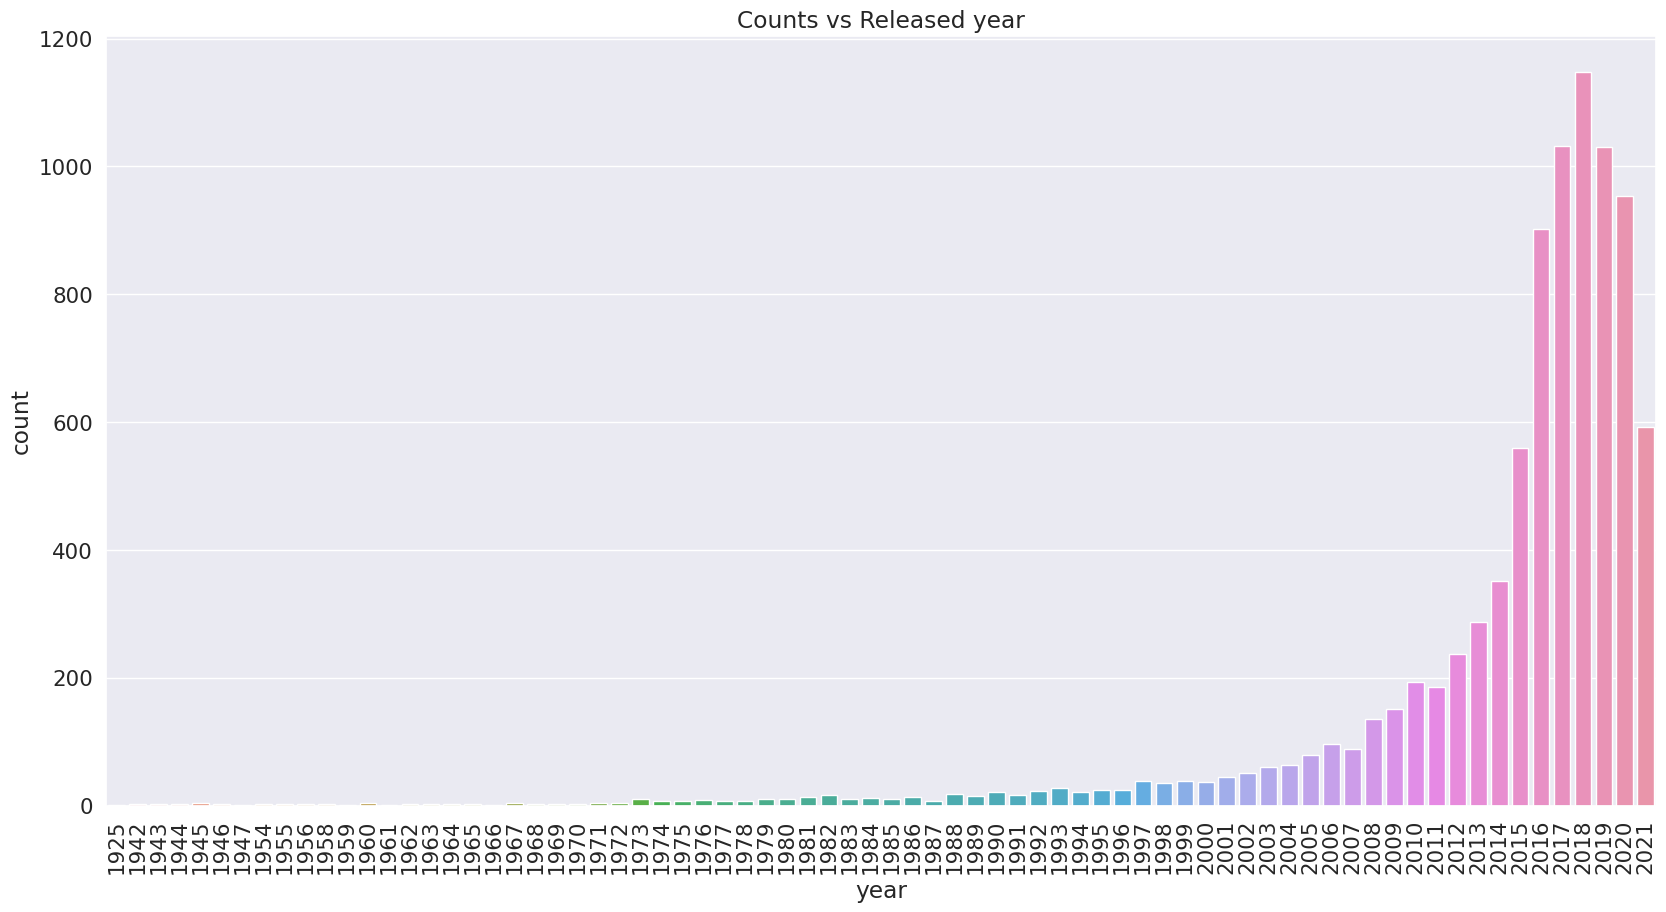

In [27]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.4)
sns.countplot(data=df , x='year')
plt.title("Counts vs Released year")
plt.xticks(rotation=90)
plt.show()

From the above countplot we can see that most movies on netflix are released in the **year range of 2015-2021. Netflix should add content from preceding years to reach a wider demographic of viewers.**

It could also be the case that in the recent years as the OTT market is booming , more content is being created in the current years . 

In [28]:
country = data.groupby("title")["country"].unique().reset_index()["country"]
type_x = data.groupby("title")["type"].unique().reset_index()["type"]
country = country.apply(lambda x : x[0])
type_x = type_x.apply(lambda x: x[0])
df = pd.DataFrame({'country':country,'type':type_x})
movie_df=df[df["type"]=="Movie"]["country"].value_counts()[:5].reset_index().rename(columns={"index":"country","country":"count"})
tv_df=df[df["type"]=="TV Show"]["country"].value_counts()[:5].reset_index().rename(columns={"index":"country","country":"count"})


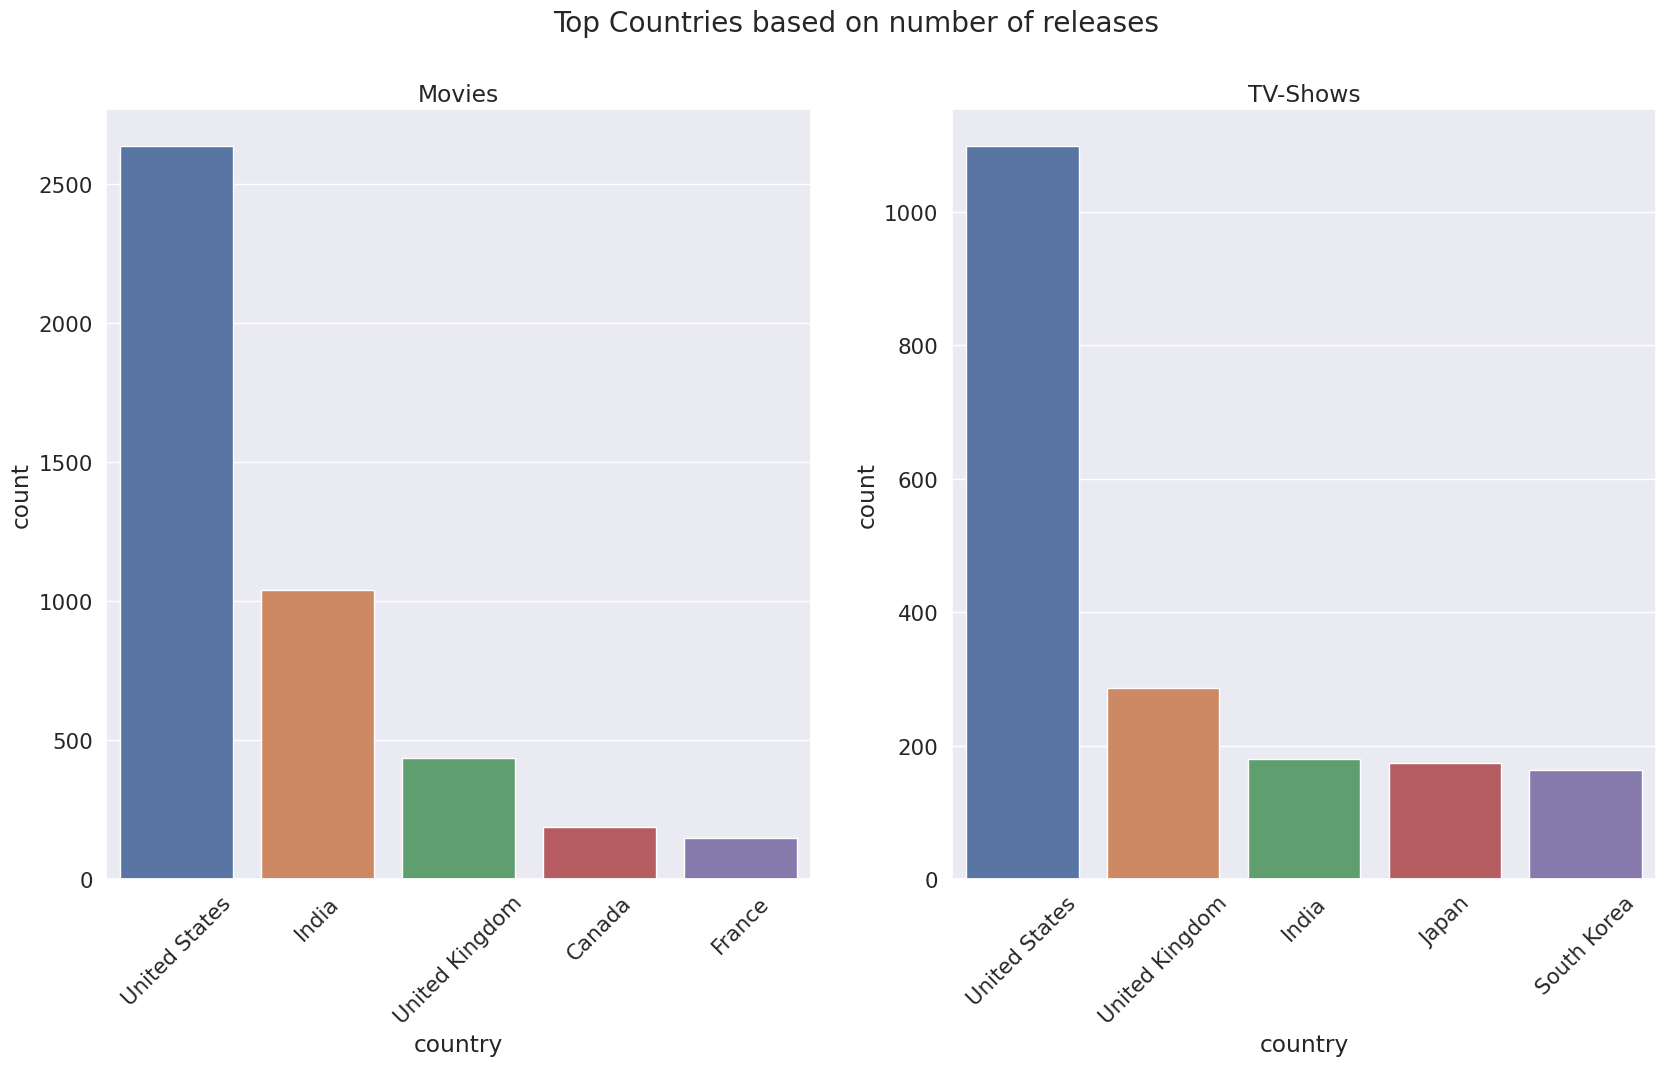

In [29]:
plt.figure(figsize=(20,10))
plt.suptitle("Top Countries based on number of releases")

plt.subplot(1,2,1)
plt.title("Movies")
plt.xticks(rotation = 45 )
sns.barplot(data=movie_df,x="country",y="count")

plt.subplot(1,2,2)
plt.title("TV-Shows")
plt.xticks(rotation = 45 )
sns.barplot(data=tv_df,x="country",y="count")
plt.show()

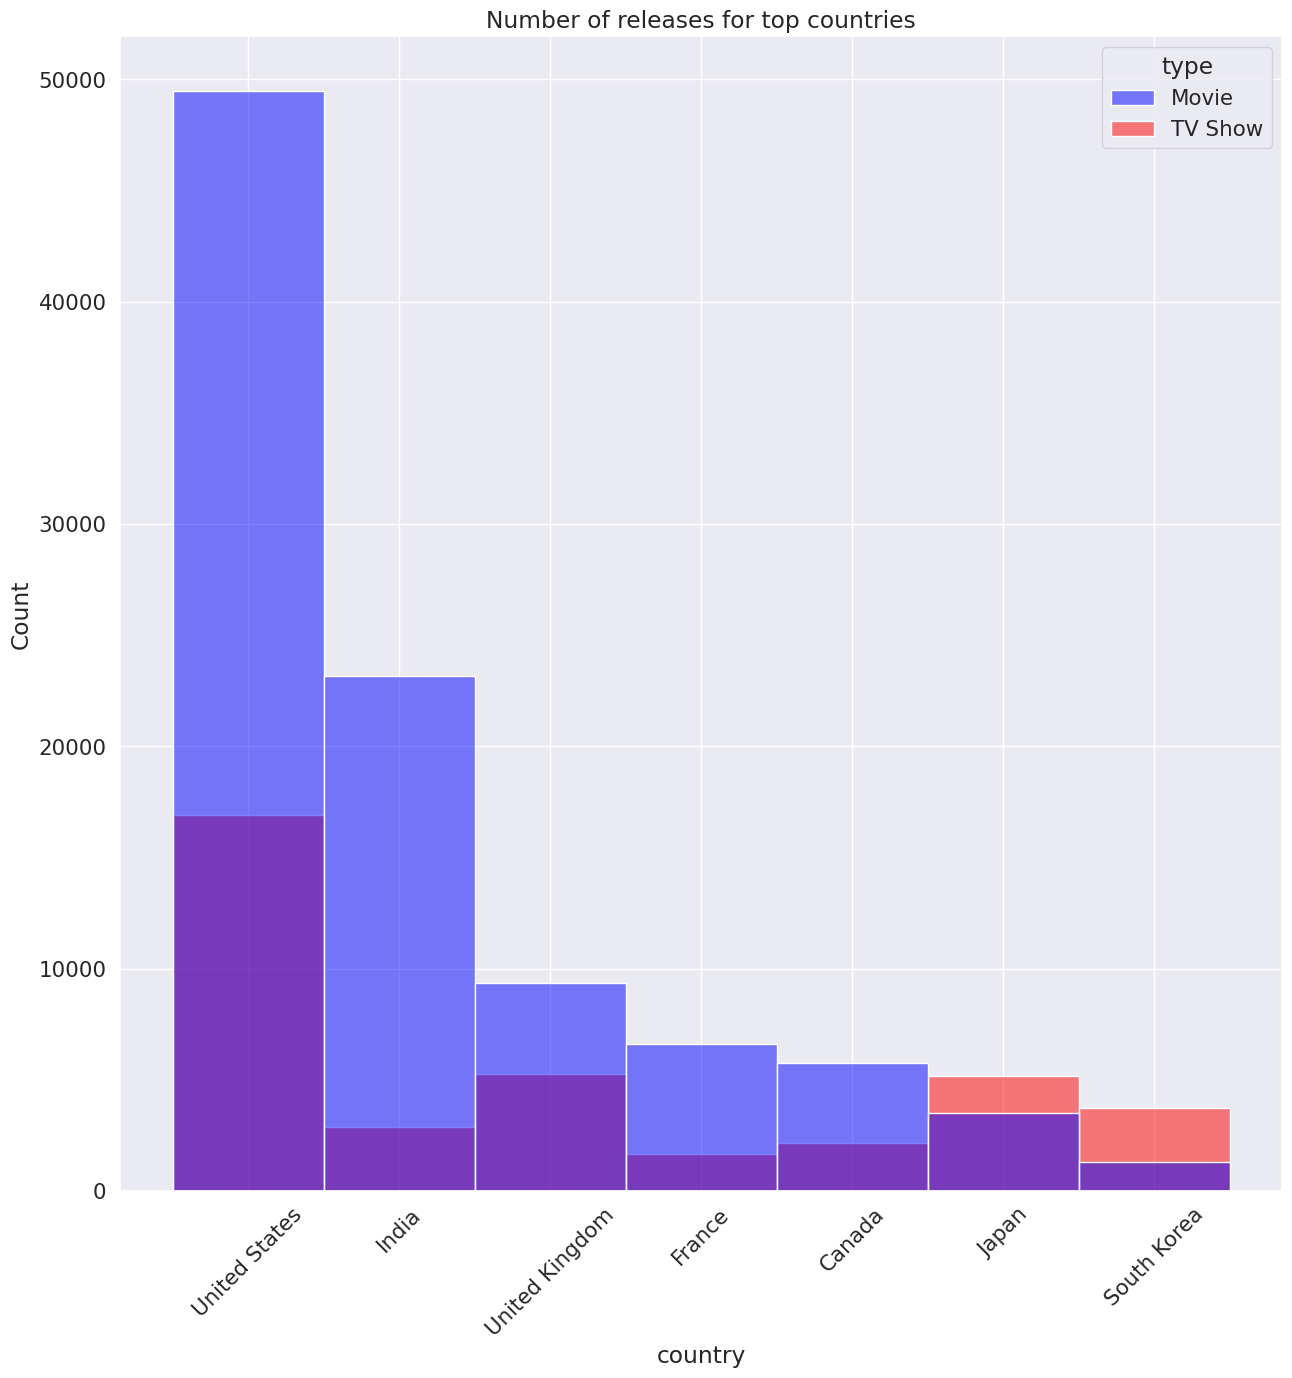

In [30]:
plt.figure(figsize=(15,15))
plt.title("Number of releases for top countries")
plt.xticks(rotation=45)

# getting top performing countries for both tv and movie

x = set(df.loc[df.type=="Movie","country"].value_counts().index[:5])
y = set(df.loc[df.type=="TV Show","country"].value_counts().index[:5])
s = x.union(y)
l=list(s)



sns.histplot(data=data[data["country"].isin(l)],x="country",hue="type",palette=["blue","red"])
plt.show()

**Most content is from these 7 countries :
Inferences** -
- India has a high movie content as compared to TV shows . Steps must be taken to increase TV shows to diversify.
- South Korea , Japan and Canada have high content but it is much less as compared to United States or India 
  The outreach should be increased in these countries so as to make the business grow .
- In France and Canada Movies seem to be more popular so more content on movies must be created . 
  

### Genere Analysis ###
**Lets make a data frame** with country wise , type wise and genere wise movie count 

In [31]:
country_list = l 
source = ["Movie","TV Show"]
genre = ["Drama" , "Comedy" , "Family" , "Romantic" , "Thriller" , "Horror" , "Mystery" , "Action" , "Documentary"]

def get_count(cun,source,genre):
    return data[(data["listed_in"].str.contains(genre)) & (data.type==source) & (data.country==cun)].count()[0]


dataframe_dict = {'country':[],'source':[],"genere":[],'count':[]}


def make_dict():
    for x in country_list:
        for y in source:
            for z in genre :
                dataframe_dict["country"].append(x)
                dataframe_dict["source"].append(y)
                dataframe_dict["genere"].append(z)
                dataframe_dict["count"].append(get_count(x,y,z[:4]))



make_dict()
df_genere = pd.DataFrame(dataframe_dict)
print("")
df_genere[df_genere["country"]=="United States"]

,country,source,genere,count
36,United States,Movie,Drama,8727
37,United States,Movie,Comedy,9159
38,United States,Movie,Family,5360
39,United States,Movie,Romantic,2378
40,United States,Movie,Thriller,2880
41,United States,Movie,Horror,2184
42,United States,Movie,Mystery,0
43,United States,Movie,Action,4778
44,United States,Movie,Documentary,1330
45,United States,TV Show,Drama,2993


<AxesSubplot: title={'center': 'TV Shows - genre,country'}, xlabel='genere', ylabel='count'>

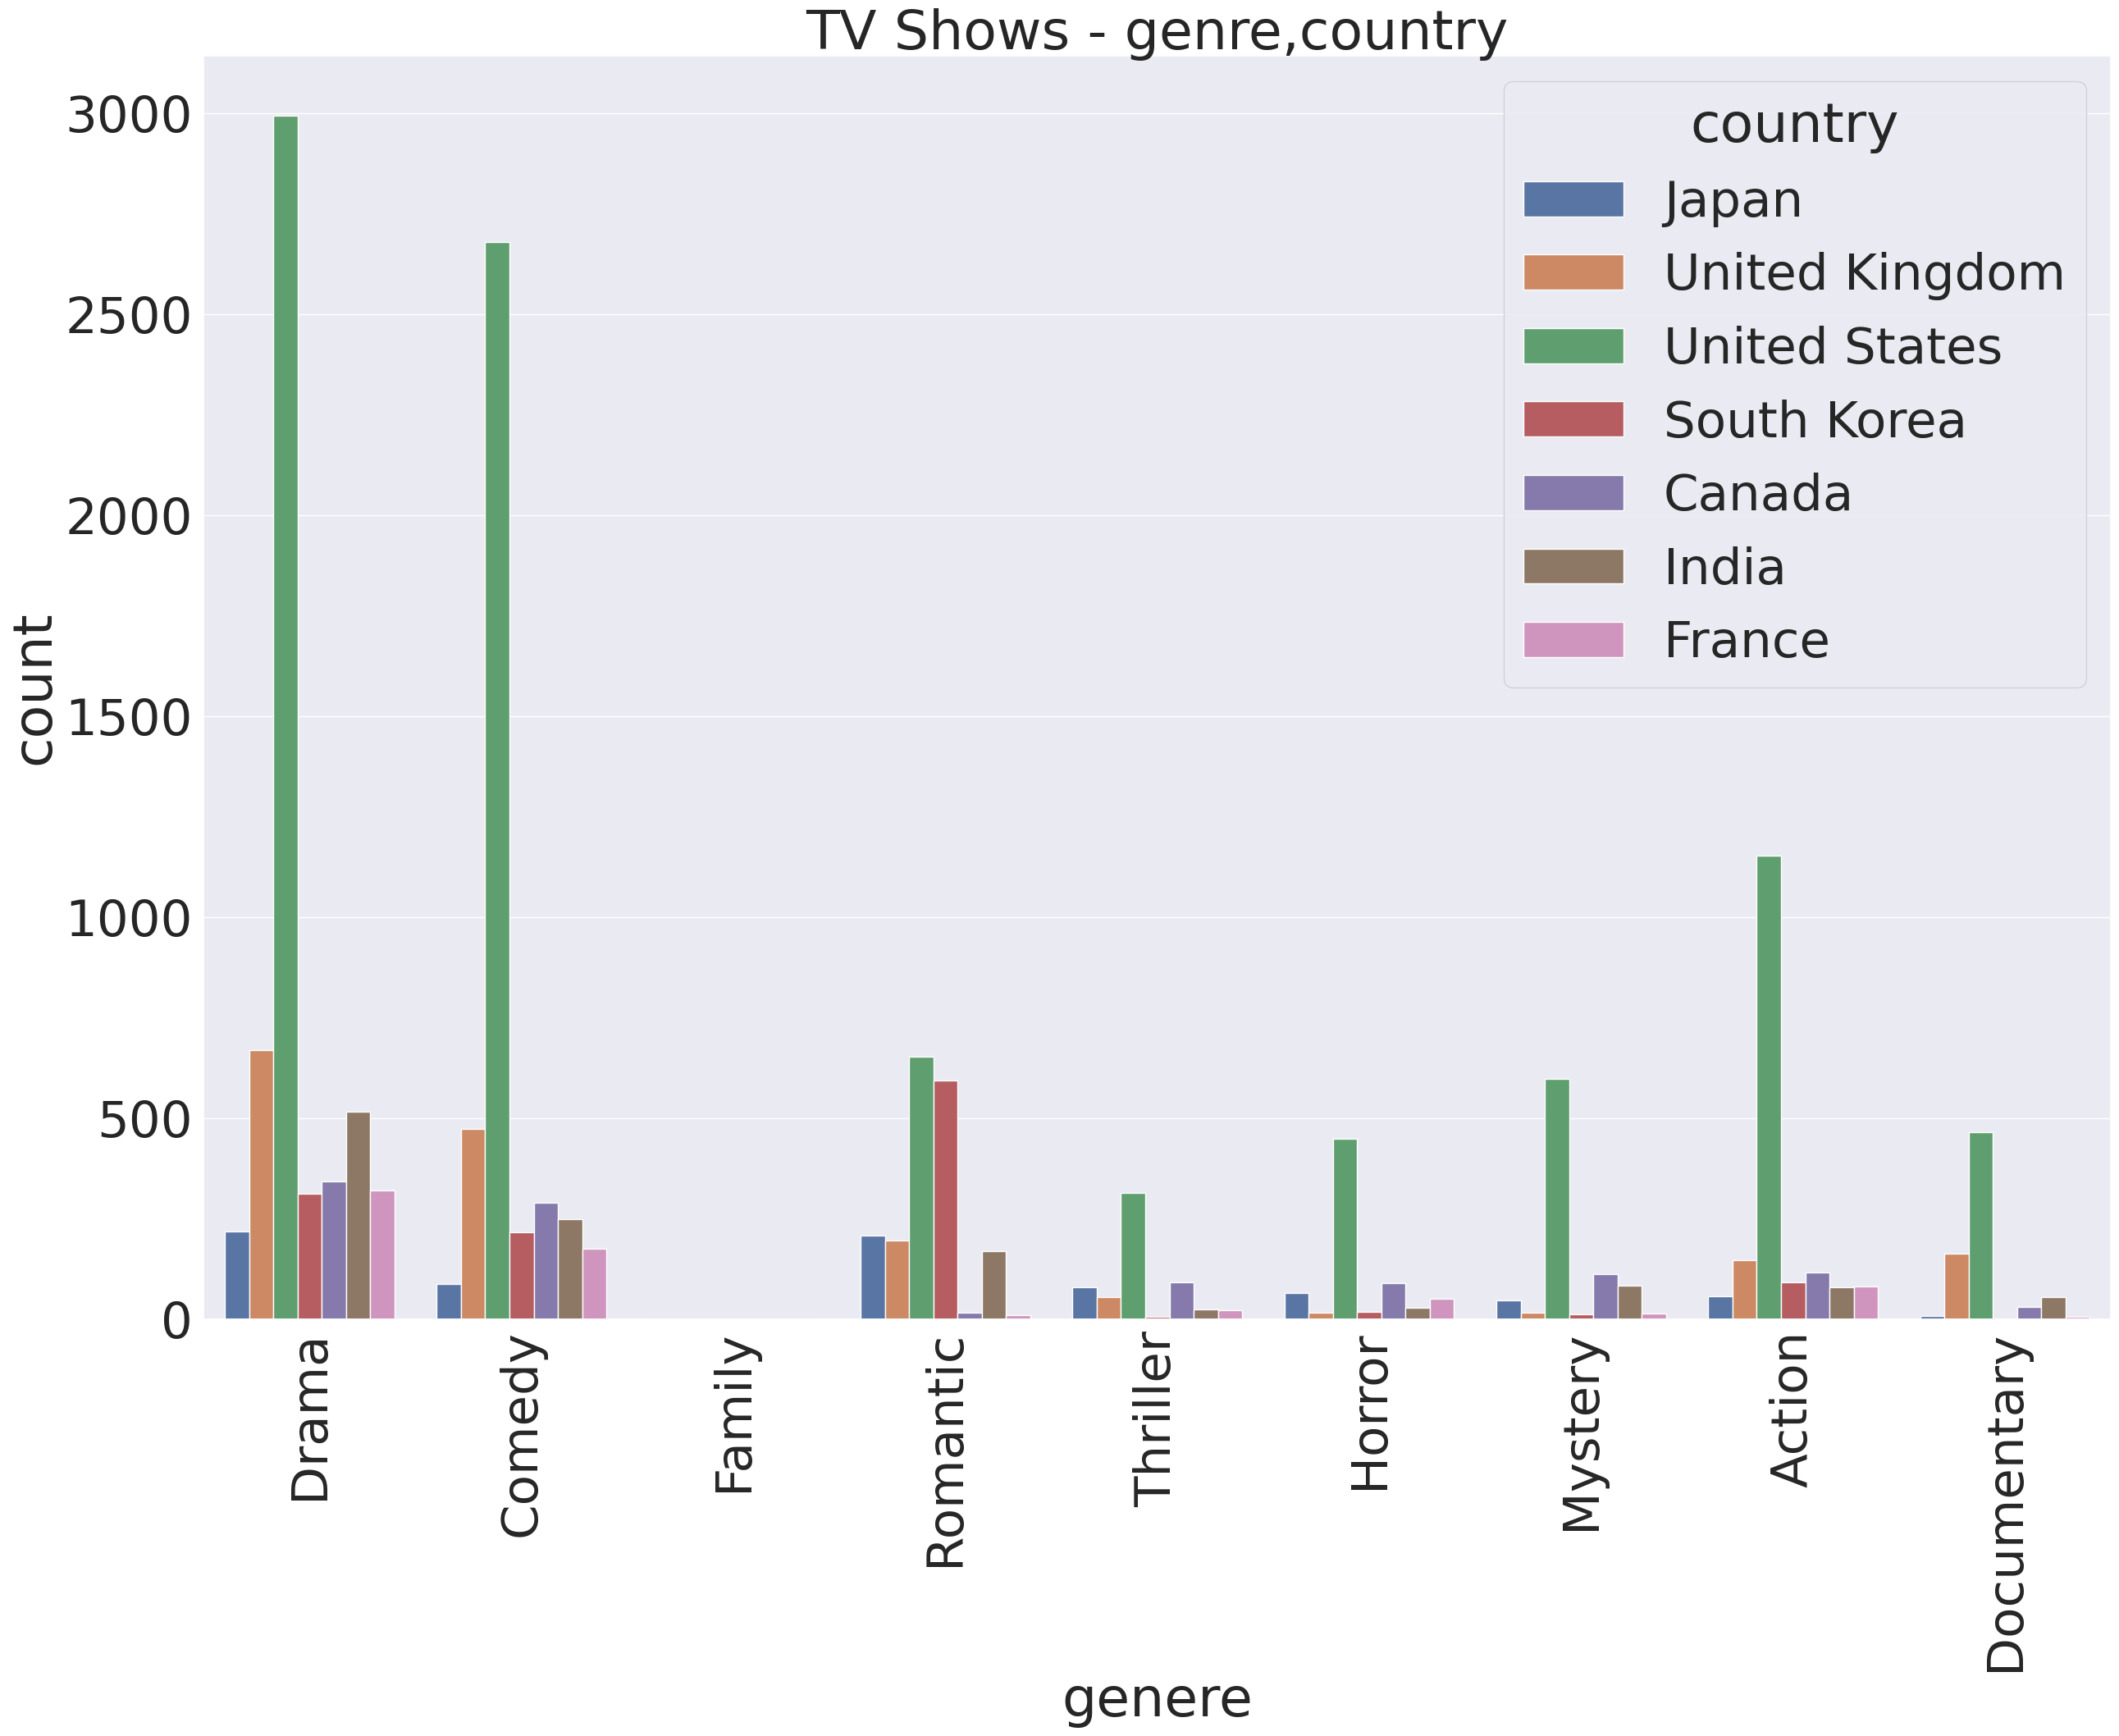

In [32]:
plt.figure(figsize=(30,20))
sns.set(font_scale=4)
plt.title("TV Shows - genre,country")
plt.xticks(rotation=90)
sns.barplot(x="genere",y="count" ,data=df_genere.loc[df_genere["source"]=="TV Show"],hue="country" )




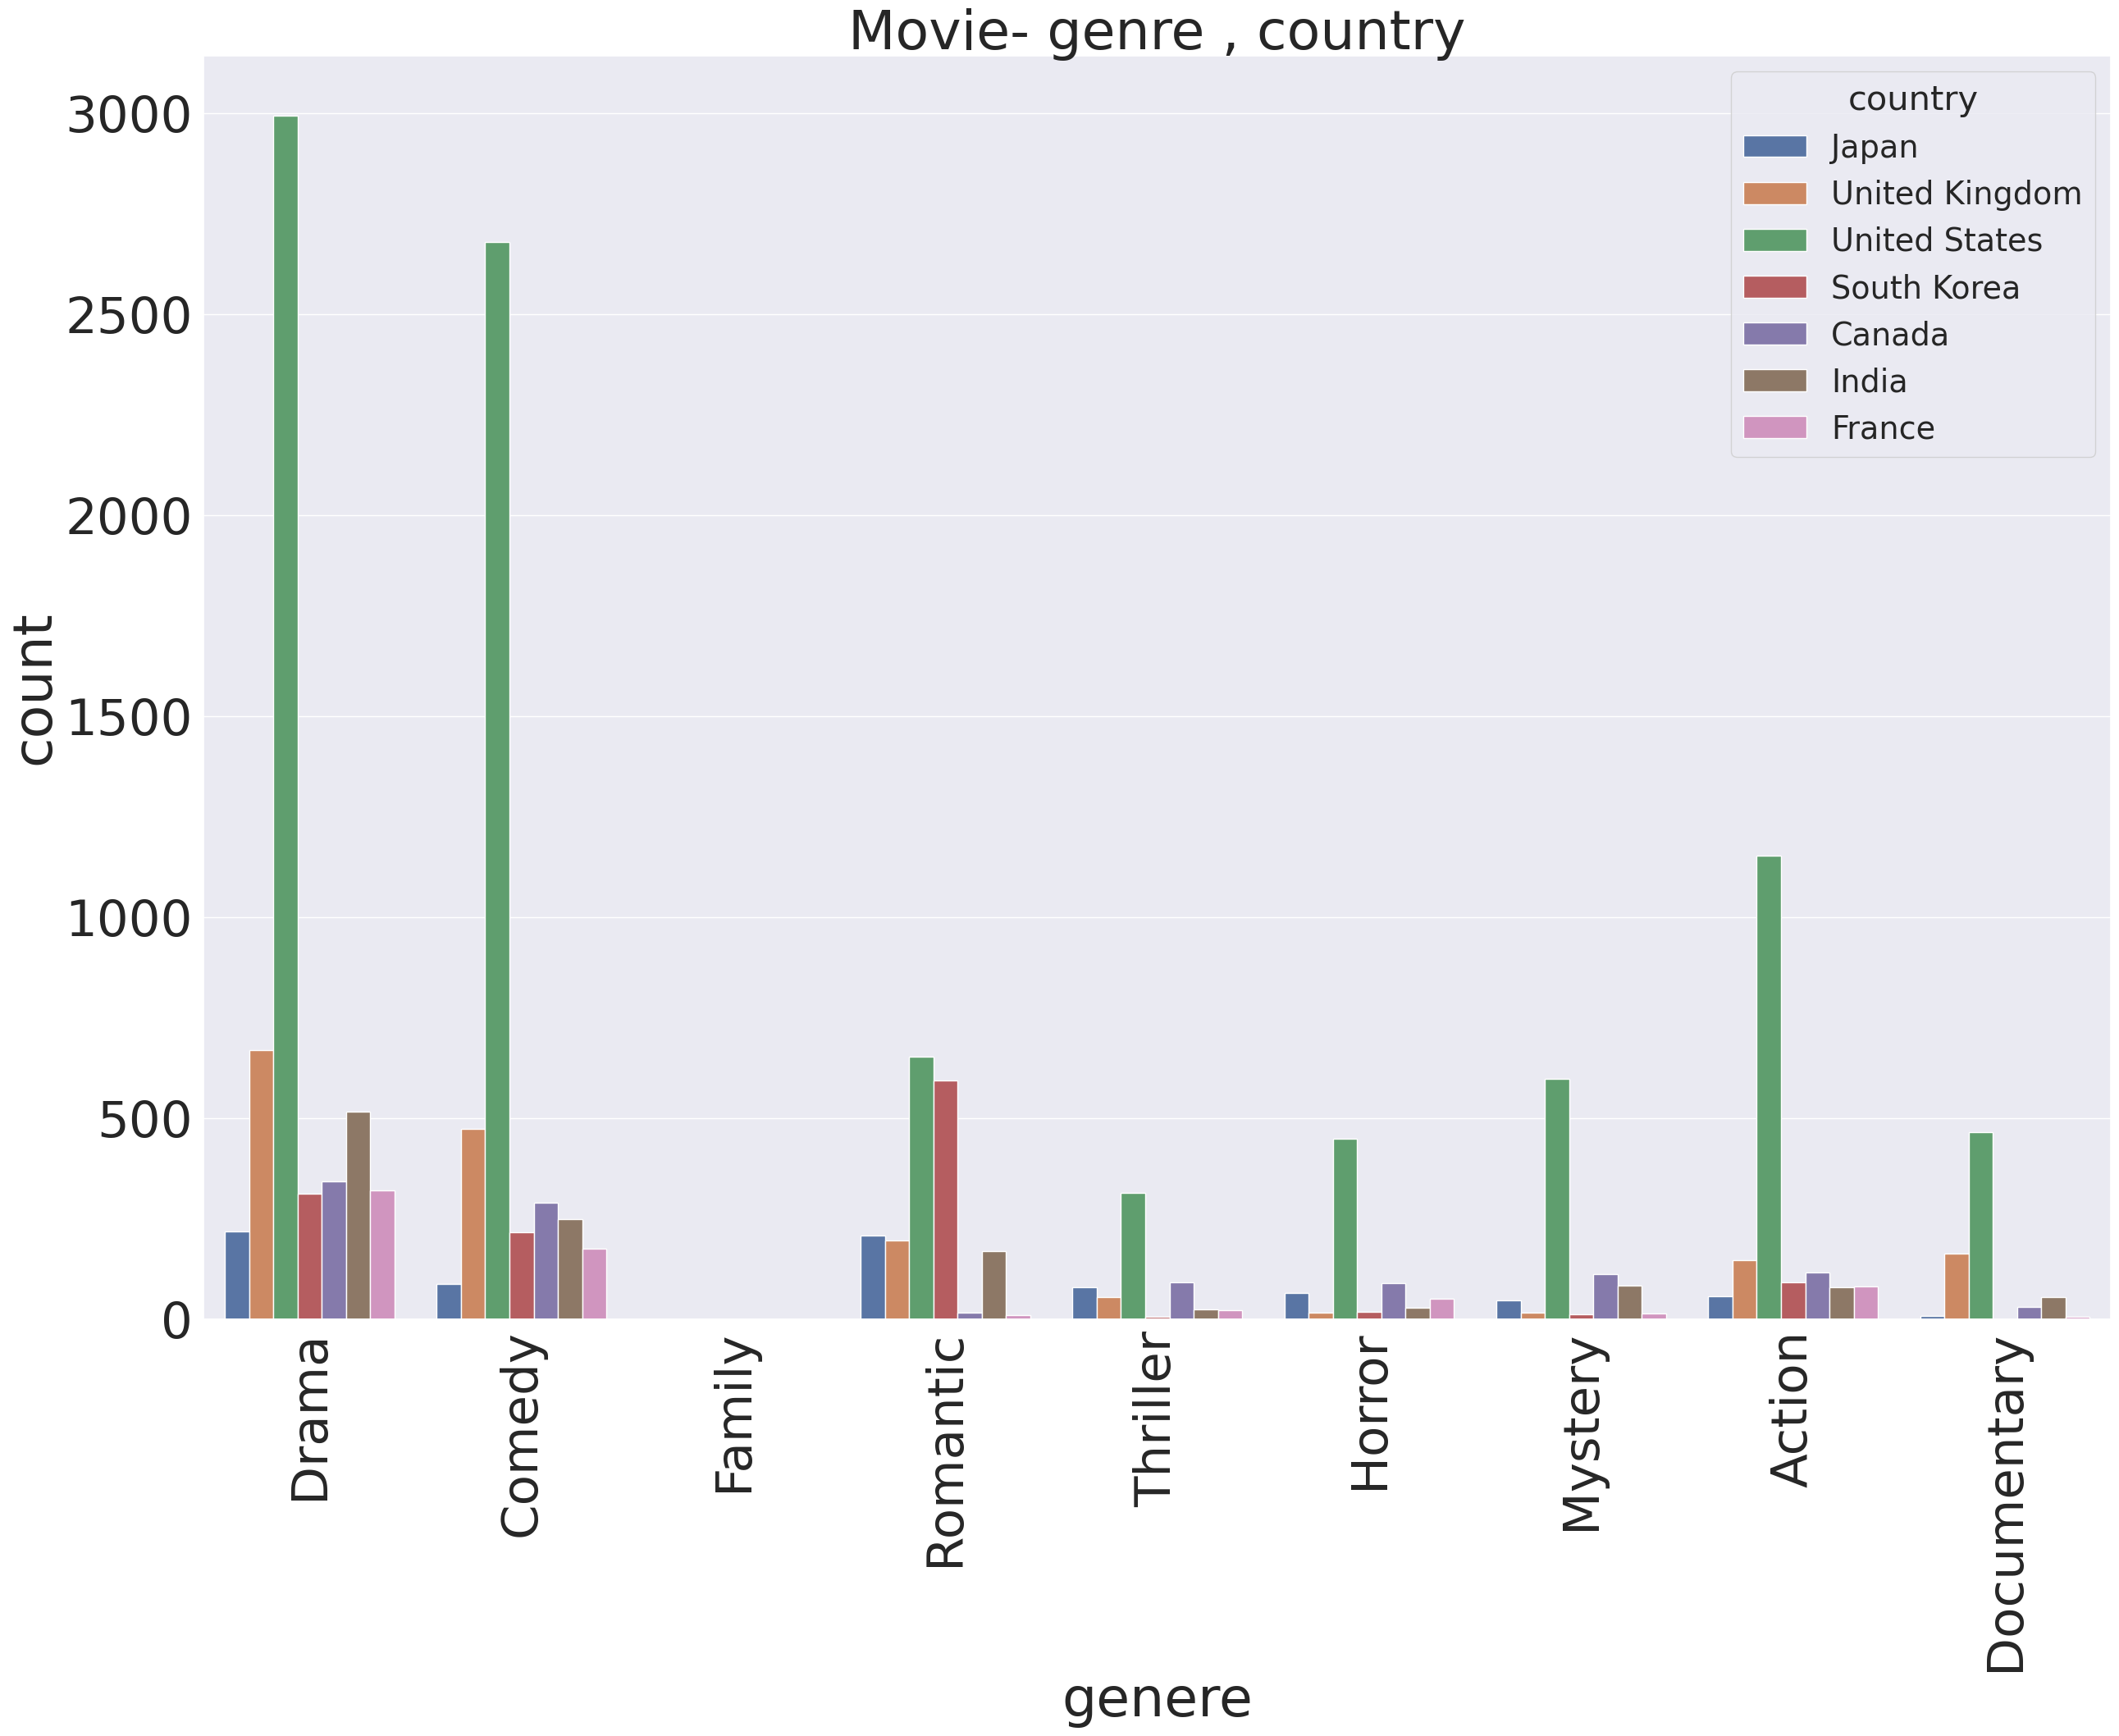

In [33]:
plt.figure(figsize=(30,20))
plt.title("Movie- genre , country")
plt.xticks(rotation=90)
sns.set(font_scale=2.5)
sns.barplot(x="genere",y="count" ,data=df_genere.loc[df_genere["source"]=="TV Show"],hue="country" )
plt.show()

### Analysis and Insights ###
- from the above two graphs we can see that **drama** and **comedy** generes seem to be more popular so efforts     should be made to invest in such movies and shows .
- Also for south korea we can see that **romantic** seems to be the dominant genere . So netflix should invest in   such movies for south korea ,
- Also seeing the low number of horror movies .. neflix should create horror content for the niche horror fans .

<AxesSubplot: title={'center': 'Movie'}, xlabel='genere', ylabel='count'>

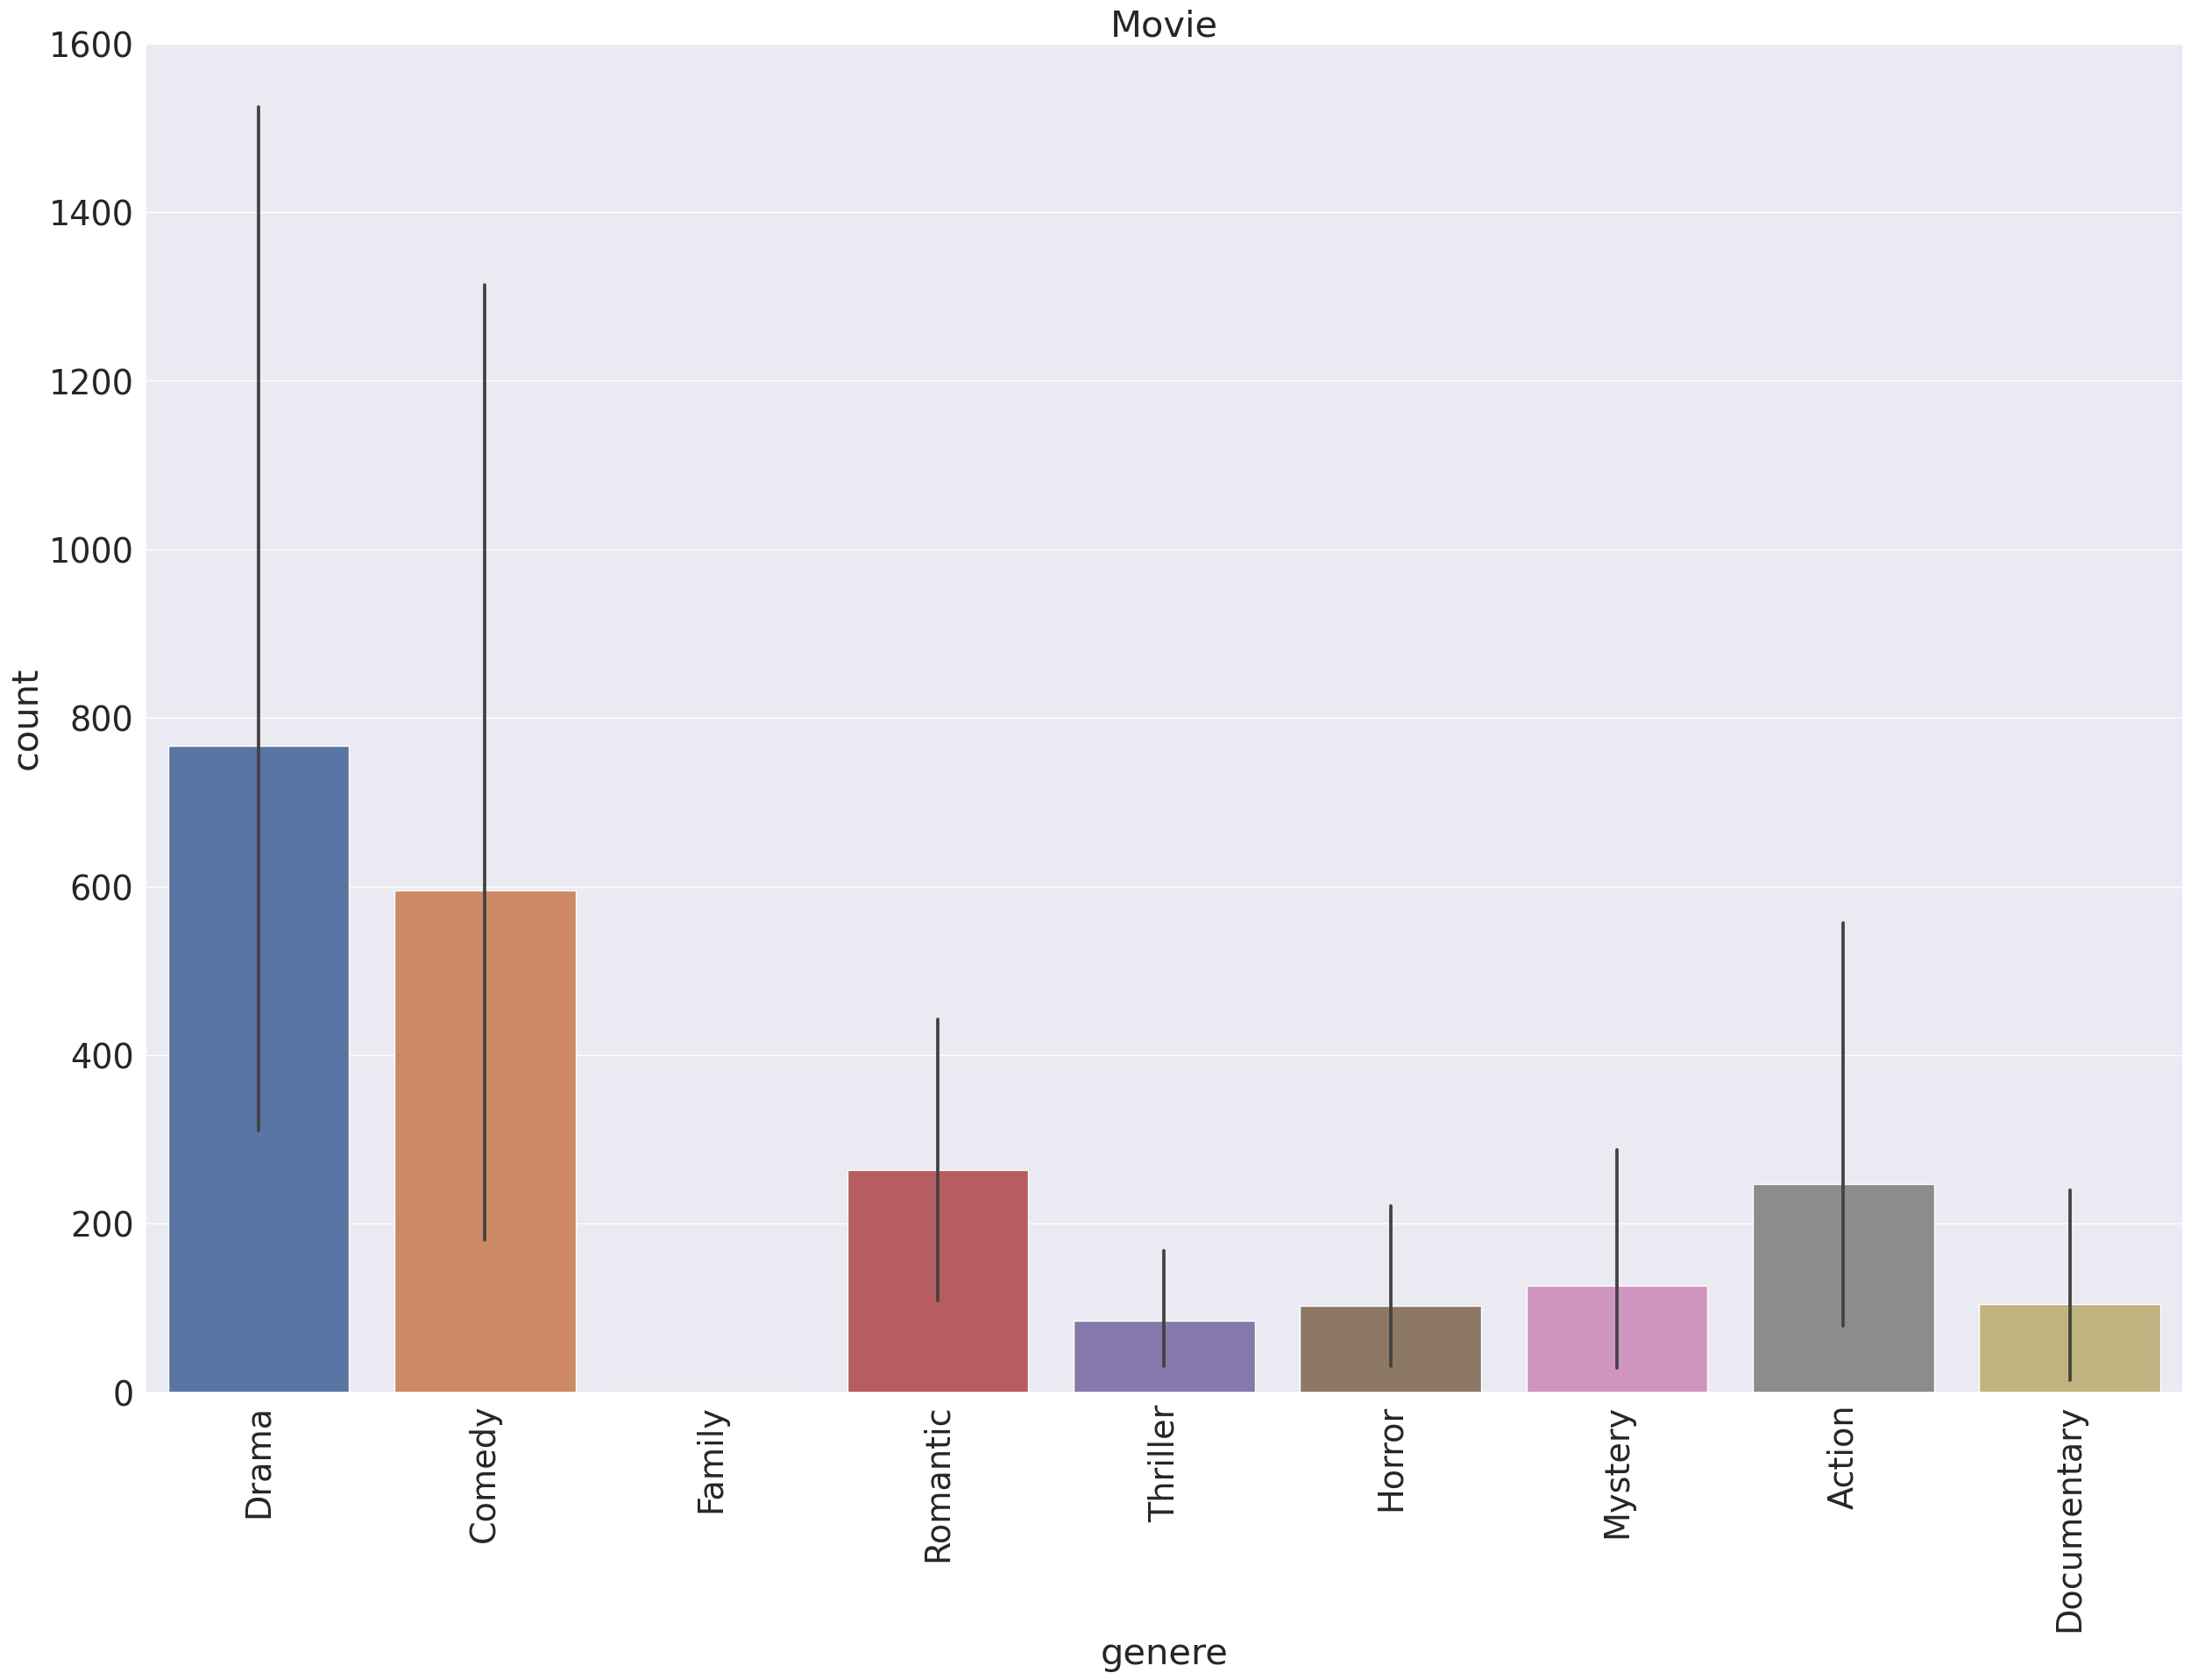

In [34]:
plt.figure(figsize=(30,20))
plt.title("Movie")
plt.xticks(rotation=90)
sns.set(font_scale=5)
sns.barplot(x="genere",y="count" ,data=df_genere.loc[df_genere["source"]=="TV Show"] )

**In the overall scenario considering all top performing countries**
- Drama and comedy again seem to be the dominant one 
- Netflix should invest in documentaries
- Romantic and Action seem to be averagely produced so we should try increasing that too . 

In [35]:
print(data[(data["type"]=="Movie") & (data["release_year"]>2019)].count()[0])
print(data[(data["type"]=="TV Show") & (data["release_year"]>2019)].count()[0])

print()
print(data[(data["type"]=="Movie") & (data["release_year"]<=2019) &  (data["release_year"]>2016)].groupby("title")["country"].value_counts())
print(data[(data["type"]=="TV Show") & (data["release_year"]<=2019) &  (data["release_year"]>2016)].count()[0])

15035
16556

title                          country       
#AnneFrank - Parallel Stories  Italy              8
#FriendButMarried              Indonesia         24
#Roxy                          Canada            16
#realityhigh                   United States     12
'89                            United Kingdom     3
                                                 ..
​Maj Rati ​​Keteki             India             16
​Mayurakshi                    India             12
​​Kuch Bheege Alfaaz           India             24
반드시 잡는다                        South Korea        3
최강전사 미니특공대 : 영웅의 탄생            United States      6
Name: country, Length: 2702, dtype: int64
22833


In [36]:
df_dict = {"range":["2017-2019","2017-2019","2019-present","2019-present"],"type":["Movie","TV Show" , "Movie","TV Show"],
          "count":[ data[(data["type"]=="Movie") & (data["release_year"]<=2019) &  (data["release_year"]>2016)].count()[0],data[(data["type"]=="TV Show") & (data["release_year"]<=2019) &  (data["release_year"]>2016)].count()[0]
           ,data[(data["type"]=="Movie") & (data["release_year"]>2019)].count()[0],data[(data["type"]=="TV Show") & (data["release_year"]>2019)].count()[0]]
          }

In [37]:
df = pd.DataFrame(df_dict)
df.head()

,range,type,count
0,2017-2019,Movie,44055
1,2017-2019,TV Show,22833
2,2019-present,Movie,15035
3,2019-present,TV Show,16556


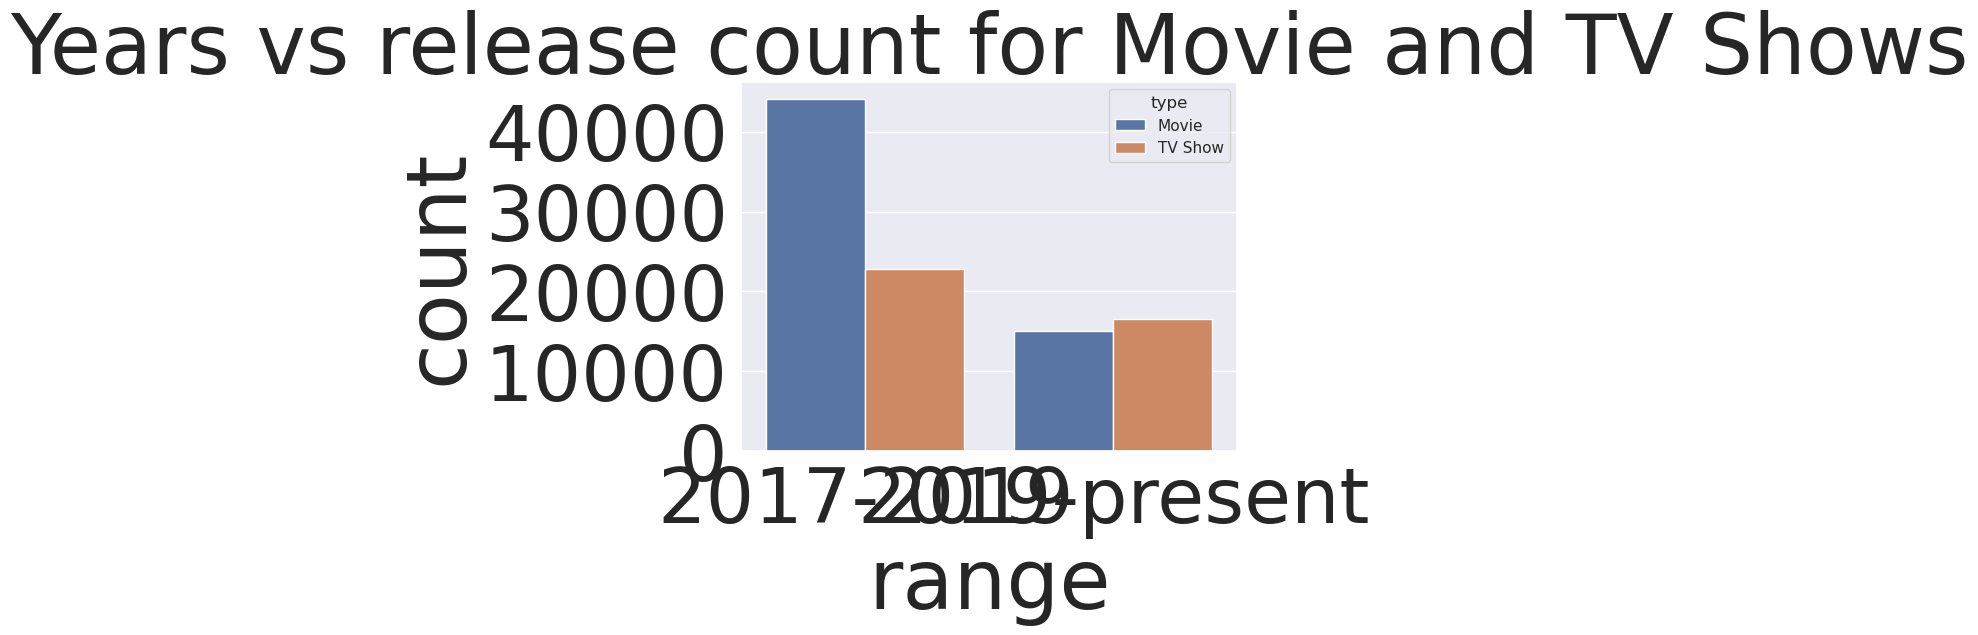

In [38]:
plt.title("Years vs release count for Movie and TV Shows")

sns.set(font_scale=1)
sns.barplot(x="range",y="count",hue="type",data=df,dodge=True)
plt.show()

### In the recent years the release count has gone down for both tv shows and movies  ###

### Also for the past three years the production direction is shifted to TV Shows from Movies ###

### Cast Analysis ###

In [39]:
df=data.loc[data.country.isin(l)].loc[:,["cast","country"]].value_counts().reset_index().rename(columns={0:"count"})
df


,cast,country,count
0,James Franco,United States,1013
1,David Attenborough,United Kingdom,310
2,Anupam Kher,India,289
3,John Paul Tremblay,Canada,108
4,Liam Neeson,France,108
...,...,...,...
35083,Lucy O'Connell,United States,1
35084,Emma Tate,India,1
35085,Hugo Speer,United States,1
35086,Lucy Walters,United States,1


In [40]:
list(df[df["country"]=="India"].iloc[:3]["cast"])

['Anupam Kher', 'Shah Rukh Khan', 'Naseeruddin Shah']

In [41]:
country_list = []
cast_list = []
count_list = []

for x in l :
    country_list.append([x,x,x])
    cast_list.append(list(df[df["country"]==x].iloc[:3]["cast"]))
    count_list.append(list(df[df["country"]==x].iloc[:3]["count"]))

country_list = [x for _ in country_list for x in _]
cast_list = [x for _ in cast_list for x in _]
count_list = [x for _ in count_list for x in _]

df_actor = pd.DataFrame({"cast":cast_list,"country":country_list,"count":count_list})
df_actor.head()

,cast,country,count
0,Yuki Kaji,Japan,107
1,Takahiro Sakurai,Japan,78
2,Daisuke Ono,Japan,62
3,David Attenborough,United Kingdom,310
4,John Cleese,United Kingdom,36


In [42]:
df_india = df_actor.loc[df_actor["country"]=="India"]
df_us = df_actor.loc[df_actor["country"]=="United States"]
df_uk = df_actor.loc[df_actor["country"]=="United Kingdom"]
df_canada = df_actor.loc[df_actor["country"]=="Canada"]
df_france = df_actor.loc[df_actor["country"]=="France"]
df_sk = df_actor.loc[df_actor["country"]=="South Korea"]
df_japan = df_actor.loc[df_actor["country"]=="Japan"]




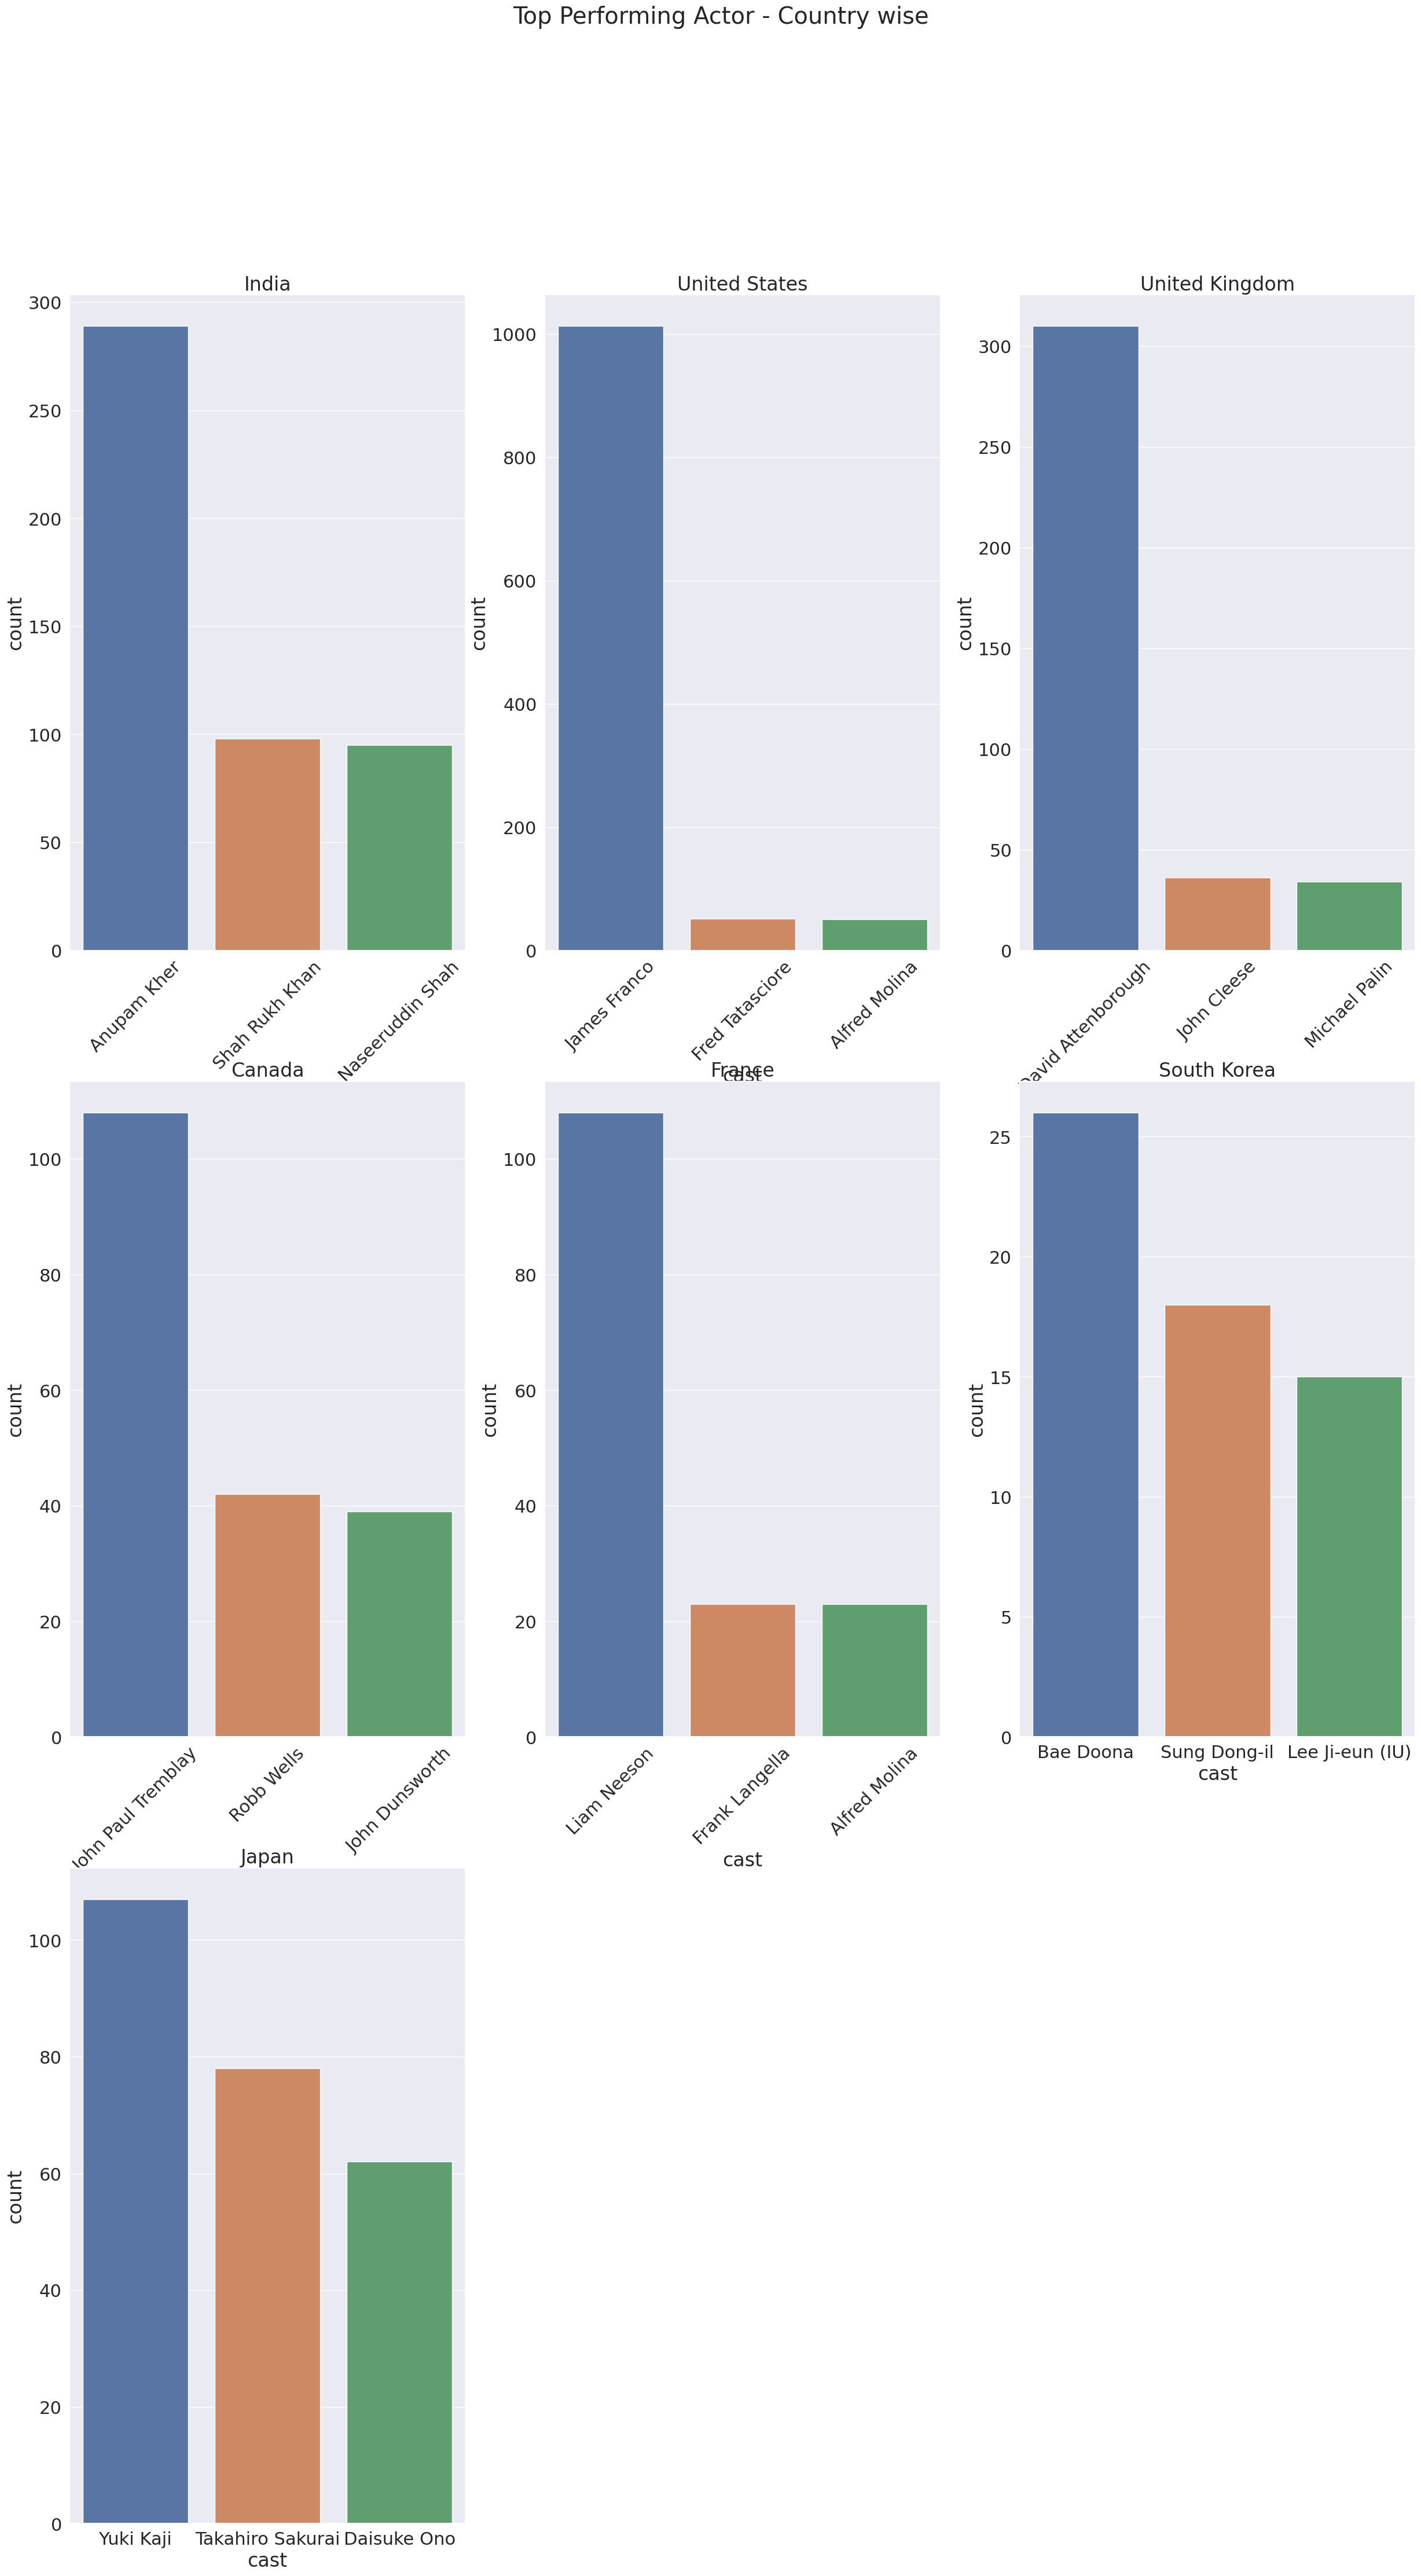

In [43]:
fig = plt.figure(figsize=(30,50))
sns.set(font_scale=2)

plt.suptitle("Top Performing Actor - Country wise")

plt.subplot(3,3,1)
plt.title("India")
plt.xticks(rotation=45)
sns.barplot(x="cast",y="count",data=df_india)

plt.subplot(3,3,2)
plt.title("United States")
plt.xticks(rotation=45)
sns.barplot(x="cast",y="count",data=df_us)

plt.subplot(3,3,3)
plt.title("United Kingdom")
plt.xticks(rotation=45)
sns.barplot(x="cast",y="count",data=df_uk)

plt.subplot(3,3,4)
plt.title("Canada")
plt.xticks(rotation=45)
sns.barplot(x="cast",y="count",data=df_canada)

plt.subplot(3,3,5)
plt.title("France")
plt.xticks(rotation=45)
sns.barplot(x="cast",y="count",data=df_france)

plt.subplot(3,3,6)
plt.title("South Korea")
sns.barplot(x="cast",y="count",data=df_sk)

plt.subplot(3,3,7)
plt.title("Japan")
sns.barplot(x="cast",y="count",data=df_japan)

plt.show()